In [2]:
#import impoirtant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#reading the file from drive
data=pd.read_csv('train.csv')
#printing data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df=data.copy()
df=df.drop('Cabin',axis=1)

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df = df[~df.Embarked.isnull()].copy()

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
df.isnull().count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

In [37]:
#splitting the jobedu fuction
df['job']=df["jobedu"].apply(lambda x:x.split(",")[0])
df['education']=df["jobedu"].apply(lambda x:x.split(",")[1])
#dropping the jobedu 
df.drop('jobedu',axis=1,inplace=True)

df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [38]:
#checking the missing values
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [4]:
#removing the null values from the dataset
df=df.drop(('Cabin'),axis=1)


NameError: name 'df' is not defined

In [39]:
#repalcing the ,issing age value with the median
age_median=df.age.median()
print(age_median)
df.age.fillna(age_median,inplace=True)
df.isnull().sum()

39.0


age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [40]:
df['month'].unique()

array(['may, 2017', nan, 'jun, 2017', 'jul, 2017', 'aug, 2017',
       'oct, 2017', 'nov, 2017', 'dec, 2017', 'jan, 2017', 'feb, 2017',
       'mar, 2017', 'apr, 2017', 'sep, 2017'], dtype=object)

In [43]:
df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,,,,,,,,,,
0,889,889,889,889,889,889,889,889,889,889


In [42]:
df=df[~df.month.isnull()].copy()
df=df[~df.response.isnull()].copy()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45131 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45131 non-null  float64
 1   salary     45131 non-null  int64  
 2   balance    45131 non-null  int64  
 3   marital    45131 non-null  object 
 4   targeted   45131 non-null  object 
 5   default    45131 non-null  object 
 6   housing    45131 non-null  object 
 7   loan       45131 non-null  object 
 8   contact    45131 non-null  object 
 9   day        45131 non-null  int64  
 10  month      45131 non-null  object 
 11  duration   45131 non-null  object 
 12  campaign   45131 non-null  int64  
 13  pdays      45131 non-null  int64  
 14  previous   45131 non-null  int64  
 15  poutcome   45131 non-null  object 
 16  response   45131 non-null  object 
 17  job        45131 non-null  object 
 18  education  45131 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


In [13]:
df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  83.475 ,  27.9   ,
        15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,  34.6542,
        63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,  24.15  ,
         9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,   6.975 ,
         7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,  79.2   ,
         6.75  ,  11.5   ,  36.75  ,   7.7958,  12.525 ,  66.6

In [42]:
#univariate analysis
#lets calculate the percentage of each job
print(df.Pclass.value_counts())

0    889
Name: Pclass, dtype: int64


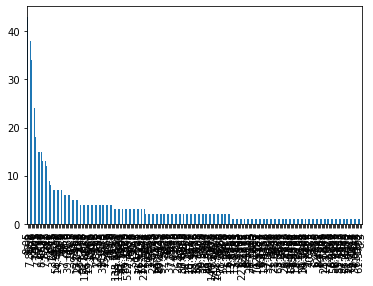

In [16]:
df.Fare.value_counts().plot.bar()

plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:ylabel='Embarked'>

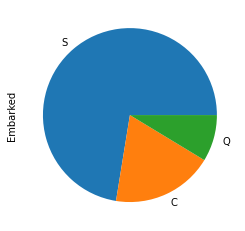

In [45]:
#low no. of unique value then pie chart
print(df.Embarked.value_counts())
df.Embarked.value_counts(normalize=True)
df.Embarked.value_counts(normalize=True).plot.pie()

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


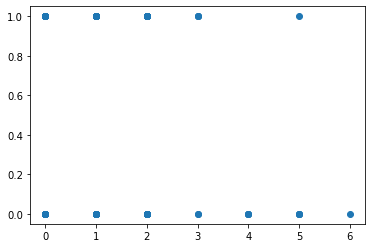

In [25]:
#bivariant analysis
#plot graph between the salary and balance
plt.scatter(df.Parch,df.Survived)
plt.show()
#how to change the axis
#df.plot.scatter(x='age',y='balance')
#plt.show()

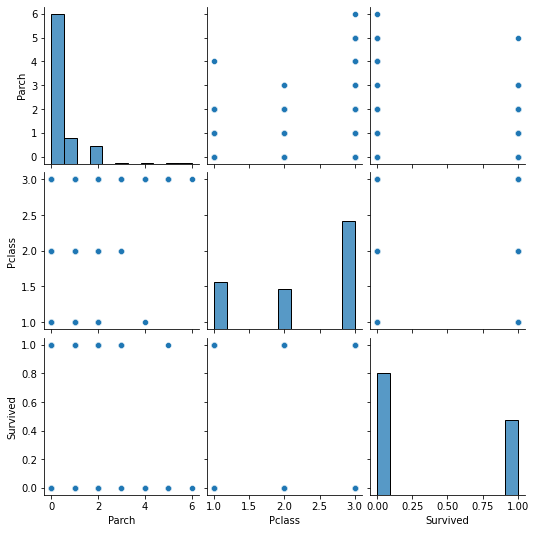

In [26]:
#pair plkot
sns.pairplot(df[['Parch','Pclass','Survived']])
plt.show()

             Parch    Pclass      Fare  Survived
Parch     1.000000  0.016824  0.217532  0.083151
Pclass    0.016824  1.000000 -0.548193 -0.335549
Fare      0.217532 -0.548193  1.000000  0.255290
Survived  0.083151 -0.335549  0.255290  1.000000


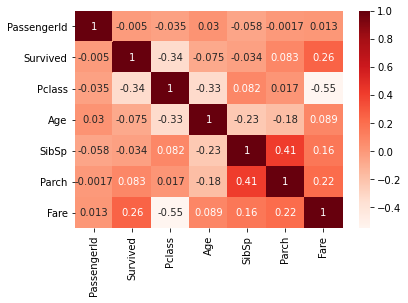

In [28]:
#correlation heatmap
print(df[['Parch','Pclass','Fare','Survived','Sex']].corr())
#heatmap code
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

             SibSp       Age  Survived
SibSp     1.000000 -0.231908 -0.034040
Age      -0.231908  1.000000 -0.074513
Survived -0.034040 -0.074513  1.000000


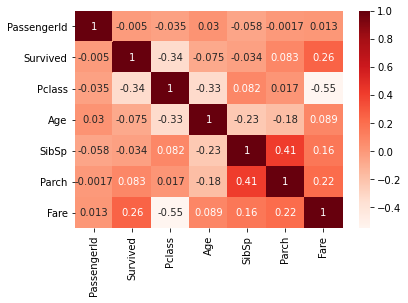

In [29]:
#correlation heatmap
print(df[['SibSp','Age','Survived','Sex']].corr())
#heatmap code
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

In [49]:
#categorical analysis
print(df.groupby('Pclass')['Survived'].count())

Pclass
0    889
Name: Survived, dtype: int64


In [53]:
#median
print(df.groupby('response')['salary'].median())

response
no     60000
yes    60000
Name: salary, dtype: int64


C:\Users\my pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


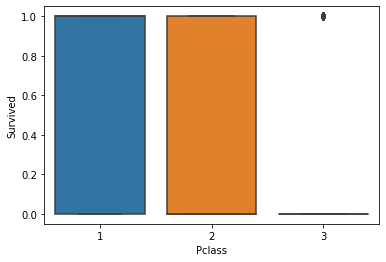

In [36]:
#box plot
sns.boxplot(data.Pclass,data.Survived)
plt.show()


In [38]:
#categorical analysis
#create a response rate where 1==yes and no==0
df['Pclass'] = np.where(df.Survived=='yes')
df.Pclass.value_counts()

ValueError: Length of values (1) does not match length of index (889)

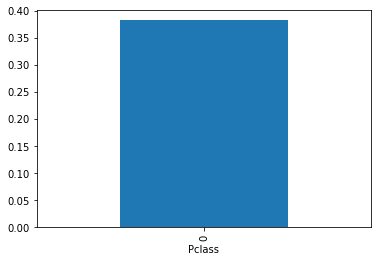

In [50]:
#plot the graph between maRITAL STATUS AND response rate
df.groupby('Pclass')['Survived'].mean().plot.bar()
plt.show()

Pclass           0
Embarked          
C         0.553571
Q         0.389610
S         0.336957


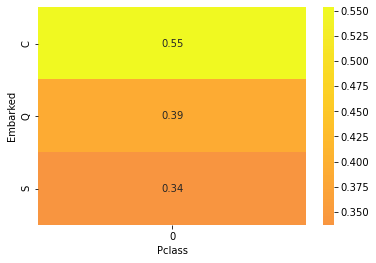

In [39]:
#multivariate analysis
result=pd.pivot_table(data=df,index='Embarked',columns='Pclass',values='Survived')
print(result)
#plotting a heatmap for the response rate
sns.heatmap(result,annot=True,cmap='plasma',center=0.117)
plt.show()

marital        divorced   married    single
job                                        
admin.         0.120160  0.113552  0.136232
blue-collar    0.077437  0.062823  0.105812
entrepreneur   0.083799  0.075772  0.113924
housemaid      0.098361  0.073707  0.160839
management     0.127813  0.126089  0.162190
retired        0.285377  0.221193  0.120370
self-employed  0.157143  0.079717  0.190045
services       0.089416  0.074198  0.117794
student        0.166667  0.185185  0.294185
technician     0.083333  0.102570  0.132747
unemployed     0.157895  0.132695  0.194514
unknown        0.058824  0.103448  0.176471


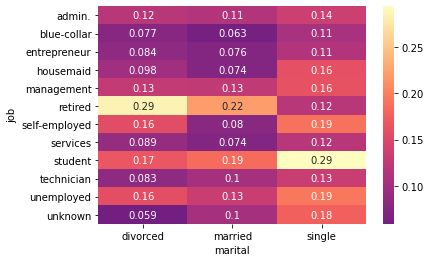

In [66]:
#multivariate analysis
result=pd.pivot_table(data=df,index='job',columns='Embarked',values='Survived')
print(result)
#plotting a heatmap for the response rate
sns.heatmap(result,annot=True,cmap='magma',center=0.117)
plt.show()